In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")


In [3]:
# data understanding

train_data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.shape



(891, 12)

In [5]:
train_data.info()

train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.loc[3,"Survived"]
# loc only takes 2 things [rows, colums] inside you can give anything
train_data.loc[0:5,["Survived","Sex"]]
train_data.iloc[2,3]

'Heikkinen, Miss. Laina'

In [8]:
women_survievd=train_data.loc[train_data.Sex =='female',"Survived"]
rate_survival_w=sum(women_survievd)/(len(women_survievd))
rate_survival_w #percent women surived.

0.7420382165605095

In [9]:
men_survievd=train_data.loc[train_data.Sex =='male',"Survived"]
rate_survival_m=sum(men_survievd)/(len(men_survievd))
rate_survival_m #men survived

0.18890814558058924

In [10]:
class_survievd=train_data.loc[train_data.Pclass ==1,"Survived"]
class_survievd_rate=sum(class_survievd)/len(class_survievd)
class_survievd_rate
# class 1 has 62%, 2 has 47% , 3 has 24%. so gender and class

0.6296296296296297

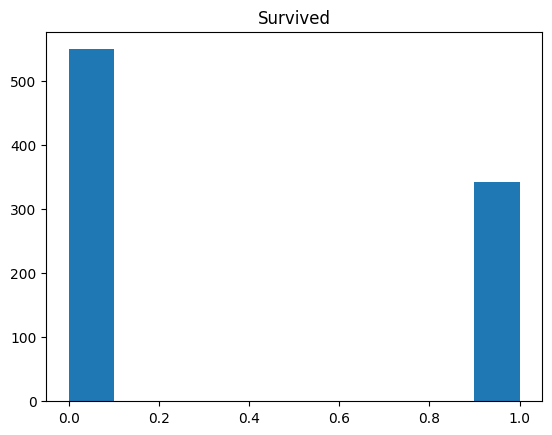

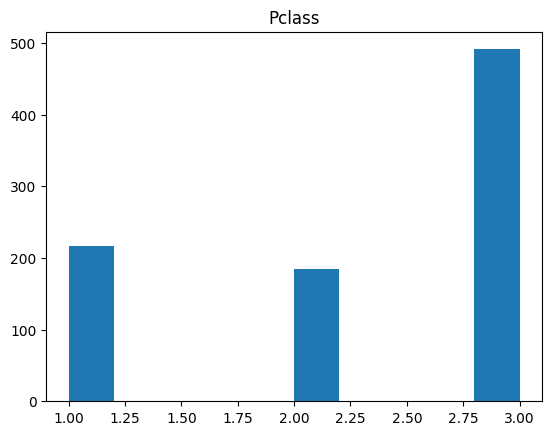

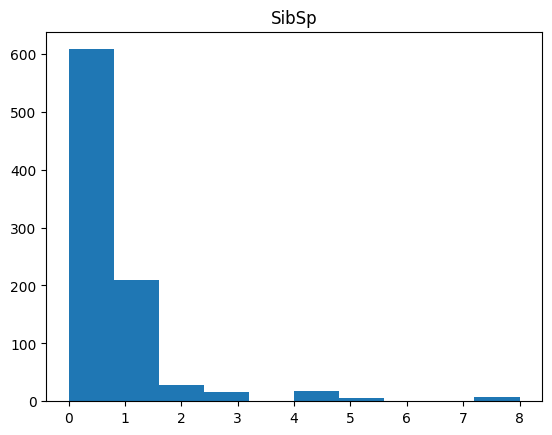

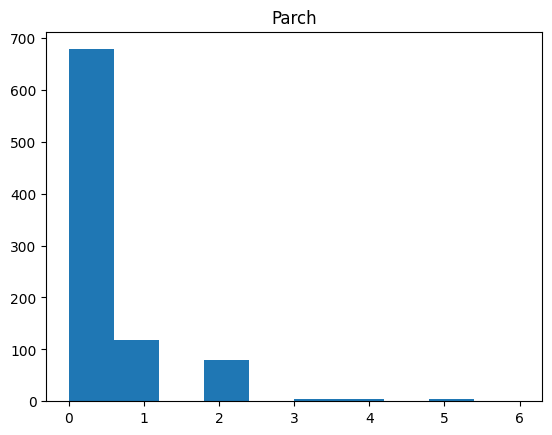

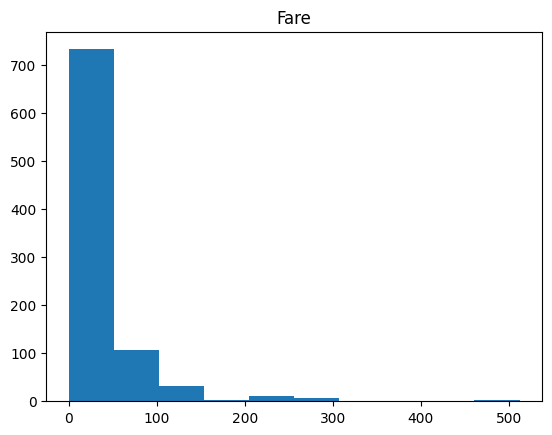

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


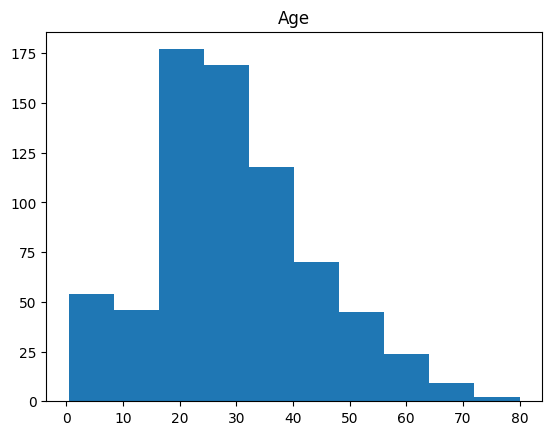

In [11]:
# which all are numeric and which are categoric
df_num = train_data[['Survived','Pclass', 'SibSp'	,'Parch','Fare','Age']]
df_cat= train_data[['Name','Sex','Cabin','Embarked','Ticket']]


for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()



In [12]:
# cabin realtion?
train_data['cabin_type']= train_data.Cabin.apply(lambda x: str(x)[0])


print(pd.pivot_table(train_data,
                     values='Sex',
                     index='Survived',
                     columns='cabin_type',
                     aggfunc='count'
                     ))

cabin_type    A     B     C     D     E    F    G    T      n
Survived                                                     
0           8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1           7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [13]:
# we fill the null values with the mean values,and drop unwanted
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
train_data.dropna(subset=['Embarked'], inplace=True)
train_data.isnull().sum()
train_data.shape
# train_data.head(2)


(889, 13)

In [14]:
x_train_vals= pd.get_dummies(train_data[['Name','Sex','cabin_type',
                                          'Embarked','Ticket',
                                          'Pclass','Age','SibSp',
                                         'Parch','Fare']])

y_train_vals = train_data["Survived"]

In [15]:
X_train, X_test_val, y_train, y_test_val = train_test_split(
    x_train_vals, y_train_vals, test_size=0.3, random_state=69)

In [16]:
logi_model = LogisticRegression(max_iter=1000)
logi_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
log_preds = logi_model.predict(X_test_val)
print("Logistic Accuracy:", accuracy_score(y_test_val, log_preds))


Logistic Accuracy: 0.8389513108614233


In [18]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [19]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [20]:
test_data.Age = test_data.Age.fillna(test_data.Age.mean())
test_data.dropna(subset=['Fare'], inplace=True)

In [44]:
# matching the train data
test_data['cabin_type'] = test_data.Cabin.apply(lambda x: str(x)[0])


X_test_data = pd.get_dummies(test_data[['Name', 'Sex', 'cabin_type',
                                        'Embarked', 'Ticket',
                                        'Pclass', 'Age', 'SibSp',
                                        'Parch', 'Fare']])

In [45]:

X_test_data = X_test_data.reindex(columns=x_train_vals.columns, fill_value=0)


In [46]:
test_predictions = logi_model.predict(X_test_data)


In [47]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

comparison = pd.merge(gender_submission, submission, on='PassengerId', suffixes=('_baseline', '_model'))


comparison['match'] = comparison['Survived_baseline'] == comparison['Survived_model']
accuracy_vs_baseline = comparison['match'].mean()
print("Agreement with gender_submission.csv:", accuracy_vs_baseline)


Agreement with gender_submission.csv: 0.9328537170263789
